In [445]:
from typing import Optional,Any,Literal
import pandas as pd
from sympy import pi,symbols,diff,init_printing,nsimplify,Rational,sympify,substitution,simplify,evalf


# Problema

Un fabricante de botellas desea calcular el diametro D de la base de una botella cónica, dado que tiene un volumen ($V$) deseado y una altura ($h$). Siendo la formula del cono la siguiente:

$$V = \frac{1}{3} \pi (\frac{D}{2})^2 h$$
 

# Datos
## Se nos proporcionan los siguientes datos

**Volumen deseado (V)** = $1.5x10^{-3}$ $m^3$ 

**Altura de botella (h)** = $0.3m$ 

# Instrucciones

**Se trabajarará con la función**
$$ f(D) = \frac{1}{3} \pi (\frac{D}{2})^2 h - V$$

# Metodo Newton-Ralphson

Se trabajara con $D_0 = 0.3 m$

Primero definimos las variables simbolicas y además ocuparemos tambien derivar la funcion antes de inicializar las iteraciones

In [446]:
init_printing()
#Se definen las variables simbolicas#
D,h,V = symbols('D h V')
funcion_volumen = 1/3*pi*(D/2)**2*h-V


Procedemos a derivar la función respecto a $D$

In [447]:
derivada_volumen = diff(funcion_volumen,D)
derivada_volumen

# Iteraciones

Ahora realizamos el ciclo para obtener el valor del Volmen optimo, manteniendo fijo el valor de $V$ y $h$

- Definimos los valores en arreglos para imprimirlos en una tabla
- Definimos un ciclo while, con un error con el valor real y con el actual, ademas de añadir los valores recopilados de las variables a los arreglos
- Imprimimos la tabla con los resultados

In [448]:
# Valor real
valor_real:float = 0.138


# Arreglos/Listas para la tabla
iteraciones:int = []
valores_xi:list = []
f_x:list = []
f_dx:list = []

Error_vr:list = []
Error_va:list = []


In [449]:
def newton_raphson() -> None:
    # Se define Xi con el valor que nos piden (0.3), para saber si ya encontramos el valor que buscamos, 
    # y utilizamos el error tambien
    Xi:float = 0.3
    iteracion:int = 0
    Er:float|int= 1

    while iteracion < 11:
        
        #Se agrega una iteracion y se agrega a la lista#
        
        iteracion += 1
        print(iteracion)

        iteraciones.append(iteracion)


        #Se evalua Xi y se agregan a la lista#
        f_xv = funcion_volumen.subs({D : Xi,V : 1.5e-3,h : 0.3}).evalf()
        f_x.append(f_xv)

        f_dxv = simplify(derivada_volumen.subs({D:Xi, h:0.3})).evalf()
        f_dx.append(f_dxv)


        #Se calcula el nuevo valor de Xi y se agrega el valor anterior de Xi a la lista utilizando
        # Newton Raphson 
        valor_anterior = Xi
        
        valores_xi.append(Xi)
        
        nuevo_valor = Xi - (f_xv/f_dxv)
        
        Xi = nuevo_valor
        
        #Se calcula el error con el valor real y el anterior

        if iteracion > 1:
            #Error con valor anterior
            
            Ea = abs((nuevo_valor - valor_anterior)/nuevo_valor)
            Er = abs((nuevo_valor - valor_real)/valor_real)
        
            Error_va.append(Ea)
            Error_vr.append(Er)

        elif iteracion == 1:
            Error_va.append("None")
            Error_vr.append("None")


        print(f_xv,nuevo_valor)


In [450]:
newton_raphson()

1
0.00556858347057703 0.181830988618379
2
0.00109672333919021 0.143432926338091
3
0.000115799983826888 0.138293202759540
4
2.07476735804696e-6 0.138197692792540
5
7.16452283631554e-10 0.138197659788538
6
8.58576238130293e-17 0.138197659788534
7
3.63972152856787e-19 0.138197659788534
8
-3.17252163160524e-19 0.138197659788534
9
3.63972152856787e-19 0.138197659788534
10
-3.17252163160524e-19 0.138197659788534
11
3.63972152856787e-19 0.138197659788534


In [451]:
iteraciones

In [452]:
pd.DataFrame({"Iteracion":iteraciones,"Valores Diametro":valores_xi,"Valores f(d)":f_x,"Valores f'(d)":f_dx,"Error v_real":Error_vr,"Error v_anterior":Error_va})

,Iteracion,Valores Diametro,Valores f(d),Valores f'(d),Error v_real,Error v_anterior
0,1,0.3,0.00556858347057703,0.0471238898038469,None,None
1,2,0.181830988618379,0.00109672333919021,0.0285619449019234,0.0393690314354437,0.267707445288945
2,3,0.143432926338091,0.000115799983826888,0.0225303913833317,0.00212465767782895,0.0371654099839427
3,4,0.138293202759540,2.07476735804696e-6,0.0217230454915388,0.00143255646768039,0.000691111154394445
4,5,0.138197692792540,7.16452283631554e-10,0.0217080428210051,0.00143231730824739,2.38817370744683e-7
5,6,0.138197659788538,8.58576238130293e-17,0.0217080376367487,0.00143231730821883,2.85192364577674e-14
6,7,0.138197659788534,3.63972152856787e-19,0.0217080376367480,0.00143231730821863,2.00839693364559e-16
7,8,0.138197659788534,-3.17252163160524e-19,0.0217080376367480,0.00143231730821883,2.00839693364559e-16
8,9,0.138197659788534,3.63972152856787e-19,0.0217080376367480,0.00143231730821863,2.00839693364559e-16
9,10,0.138197659788534,-3.17252163160524e-19,0.0217080376367480,0.00143231730821883,2.00839693364559e-16


In [453]:
import seaborn as sb
import matplotlib.pyplot as plt

In [454]:
df = pd.DataFrame({'x':iteraciones,'y':valores_xi})
df["x"] = df["x"].astype(float)
df["y"] = df["y"].astype(float)


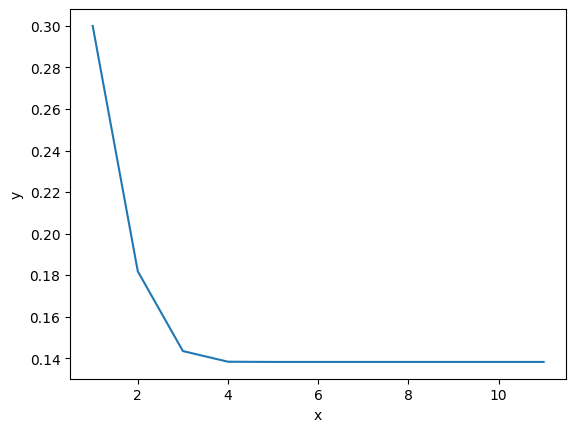

In [455]:
sb.lineplot(x='x',y = 'y',data= df)
plt.show()

# Metodo de la Secante 